# BTE -- Question #2 -- Use Case Workflow

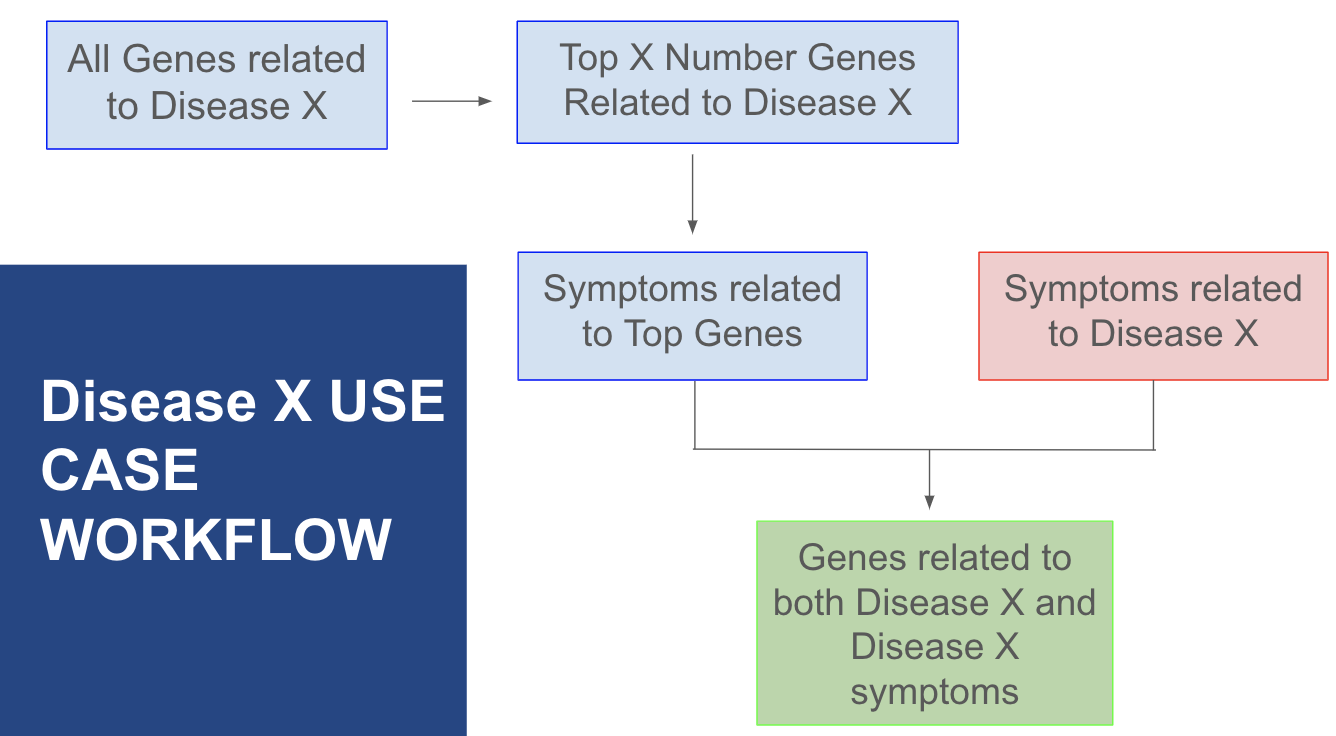

In [43]:
from IPython.display import Image 
Image("disease_work_flow.png")

## 0. Uploads, Functions, and Parameters

In [44]:
# Import pandas and biothings explorers modules
import pandas as pd
from biothings_explorer.user_query_dispatcher import FindConnection
from biothings_explorer.hint import Hint
ht = Hint()

In [45]:
# set list constant that represents every node type available in BTE
ALL_NODE_TYPES = ['Gene', 'SequenceVariant', 'ChemicalSubstance', 'Disease', 
                'MolecularActivity', 'BiologicalProcess', 'CellularComponent', 
                'Pathway', 'AnatomicalEntity', 'PhenotypicFeature']

In [46]:
# predict_many funciton will be used to run many BTE queries and return results as a single table
def predict_many(input_object_list, output_type_list, intermediate_node_list = ''):
    df_list = []
    for input_object in input_object_list: 
        for output_type in output_type_list: 
            if(len(intermediate_node_list) > 0):
                for inter in intermediate_node_list:
                    try: 
                        print("Running: " + input_object['name'] + ' --> intermediate type ' + inter + ' --> output type ' + output_type )
                        fc = FindConnection(input_obj=input_object, output_obj=output_type, intermediate_nodes=[inter])
                        fc.connect(verbose=False)
                        df = fc.display_table_view()
                        rows = df.shape[0]
                        if(rows > 0):
                            df_list.append(df)
                    except:
                        print(input_object['name'] + ' --> intermediate type ' + inter + ' --> output type ' + output_type + ' FAILED')
            else:
                try:
                    print("Running: " + input_object['name'] + ' --> output type ' + output_type )
                    fc = FindConnection(input_obj=input_object, output_obj=output_type, intermediate_nodes=None)
                    fc.connect(verbose=False)
                    df = fc.display_table_view()
                    rows = df.shape[0]
                    if(rows > 0):
                        df_list.append(df)
                except:
                    print(input_object['name'] + ' --> output type ' + output_type + ' FAILED')

    if(len(df_list) > 0):
        return pd.concat(df_list)
    else:
        return None

In [47]:
# max_one_step_genes represents the number of genes returned from direct disease -> gene query 
# that will be included in results. Genes with most occurrences will be included over those with less
max_one_step_genes = 100

# max_two_step_genes represents the number of genes returned from disease -> intermediate node -> gene query 
max_two_step_genes = 100

# set disease name
disease_name = 'Cystic Fibrosis'.lower()

# set disease output files
disease_csv_file = 'Cystic_Fibrosis_BTE_2020_09_18.csv'
disease_symptoms_csv = 'Cystic_Fibrosis_Symptoms_2020_09_18.csv'

## 1. Get Disease Symptoms and Symptom Information 

### 1.1 Get Disease

In [48]:
# run hint query to get disease input
disease = ht.query(disease_name)['Disease'][0]
print(disease)

{'MONDO': 'MONDO:0009061', 'DOID': 'DOID:1485', 'UMLS': 'C0010674', 'name': 'cystic fibrosis', 'MESH': 'D003550', 'OMIM': '219700', 'ORPHANET': '586', 'primary': {'identifier': 'MONDO', 'cls': 'Disease', 'value': 'MONDO:0009061'}, 'display': 'MONDO(MONDO:0009061) DOID(DOID:1485) OMIM(219700) ORPHANET(586) UMLS(C0010674) MESH(D003550) name(cystic fibrosis)', 'type': 'Disease'}


### 1.2 Get 'PhenotypicFeatures' Related to Disease

In [49]:
# get phenotypes (signs and symptoms) related to diesase
fc = FindConnection(input_obj=disease, output_obj='PhenotypicFeature', intermediate_nodes=None)
fc.connect(verbose=False)
disease_to_phenotypicFeature = fc.display_table_view()
disease_to_phenotypicFeature

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,output_type,output_name,output_id
0,CF,Disease,caused_by,SEMMED,SEMMED Disease API,18499536,PhenotypicFeature,C0034917,UMLS:C0034917
1,CF,Disease,treated_by,SEMMED,SEMMED Disease API,8125859,PhenotypicFeature,C0034917,UMLS:C0034917
2,CF,Disease,related_to,SEMMED,SEMMED Disease API,23094061,PhenotypicFeature,C0034917,UMLS:C0034917
3,CF,Disease,coexists_with,SEMMED,SEMMED Disease API,"11375334,1550446,15745932,2087940,3042255",PhenotypicFeature,C0159069,UMLS:C0159069
4,CF,Disease,coexists_with,SEMMED,SEMMED Disease API,"15486385,20812243",PhenotypicFeature,C0456984,UMLS:C0456984
5,CF,Disease,coexists_with,SEMMED,SEMMED Disease API,"6789859,6981383",PhenotypicFeature,C0542213,UMLS:C0542213
6,CF,Disease,related_to,None,BioLink API,None,PhenotypicFeature,DISTAL INTESTINAL OBSTRUCTION SYNDROME,UMLS:C2939175
7,CF,Disease,related_to,hpo,mydisease.info API,None,PhenotypicFeature,DISTAL INTESTINAL OBSTRUCTION SYNDROME,UMLS:C2939175
8,CF,Disease,related_to,None,BioLink API,None,PhenotypicFeature,DECREASED ANTIBODY LEVEL IN BLOOD,UMLS:C0086438
9,CF,Disease,related_to,None,BioLink API,None,PhenotypicFeature,DECREASED IMMUNE FUNCTION,UMLS:C0021051


In [50]:
# Print equivalent names for the disease input
print('Note: all equivalent names for the disease input are as follows:')
for name in fc.fc.display_node_info(disease_name)['equivalent_ids']['name']: print(name)

Note: all equivalent names for the disease input are as follows:
CF
CYSTIC FIBROSIS
CYSTIC FIBROSIS; CF
MUCOVISCIDOSIS
PULMONARY CYSTIC FIBROSIS


In [51]:
# create dictionary of symptom HPIDs, nad symptom names (with synonyms)
symptom_dict = {}

for index, row in disease_to_phenotypicFeature.iterrows():
    if(disease_to_phenotypicFeature['pred1_source'][index] == "hpo"):
        output_name = disease_to_phenotypicFeature['output_name'][index]
        items = fc.fc.G[disease_name][output_name].values()
        for item in items: 
    #         print(item)
            if('frequency' in item['info']):
                freq = [_item['info']['frequency'] for _item in fc.fc.G[disease_name][output_name].values() if "frequency" in _item["info"]][0][0]
                freq_value = ht.query(freq)['PhenotypicFeature'][0]['name']
            else: 
                freq_value = 'Unknown'
            try:             
                symptom_dict[fc.fc.display_node_info(output_name)['equivalent_ids']['HP'][0]] = {
                    "names": fc.fc.display_node_info(output_name)['equivalent_ids']['name'],
                    "frequency": freq_value,
                }
            except: 
                pass
print(symptom_dict)

{'HP:0004401': {'names': ['DISTAL INTESTINAL OBSTRUCTION SYNDROME', 'MECONIUM ILEUS', 'MECONIUM ILEUS IN NEONATES', 'MECONIUM ILEUS ON ULTRASONOGRAPHY'], 'frequency': 'Unknown'}, 'HP:0002613': {'names': ['BILIARY CIRRHOSIS', 'PRIMARY BILIARY CIRRHOSIS'], 'frequency': 'Unknown'}, 'HP:0002150': {'names': ['ELEVATED URINE CALCIUM LEVELS', 'HYPERCALCINURIA', 'HYPERCALCIURIA'], 'frequency': 'Unknown'}, 'HP:0002110': {'names': ['BRONCHIECTASIS', 'PERMANENT ENLARGEMENT OF THE AIRWAYS OF THE LUNGS'], 'frequency': 'Unknown'}, 'HP:0002099': {'names': ['ASTHMA', 'BRONCHIAL ASTHMA', 'REACTIVE AIRWAY DISEASE'], 'frequency': 'Unknown'}, 'HP:0002035': {'names': ['RECTAL PROLAPSE', 'RECTAL PROLAPSED', 'RECTUM PROTRUDES THROUGH ANUS'], 'frequency': 'Unknown'}, 'HP:0001738': {'names': ['EXOCRINE PANCREATIC INSUFFICIENCY', 'INABILITY TO PROPERLY DIGEST FOOD DUE TO LACK OF PANCREATIC DIGESTIVE ENZYMES', 'PANCREATIC INSUFFICIENCY'], 'frequency': 'Frequent'}, 'HP:0003251': {'names': ['MALE INFERTILITY'], 'f

In [13]:
# create list of HPIDs and Symptoms for later use
disease_symptom_hpids = list(symptom_dict.keys())
disease_symptoms = []
for entry in list(symptom_dict.values()): disease_symptoms = disease_symptoms + entry['names']


# create dict of HPIDs : symptoms for use in assembling final results
symptom_to_hpid_dict = {}
for key,value in symptom_dict.items(): 
    for name in value['names']:
        symptom_to_hpid_dict[name] = key

In [38]:
# add "edges out" counts from each phenotype to any node type, to get a rough estimate of how prevalent a phenotype is
phenotype_inputs = []
for hpid in disease_symptom_hpids: 
    try: 
        phenotype_input = ht.query(hpid)['PhenotypicFeature'][0]
        all_edges_out_df = predict_many([phenotype_input], ['Disease'])
        symptom_dict[hpid]['edges_out_count'] = all_edges_out_df.shape[0]
    except: 
        print(hpid + ' Failed')

print(symptom_dict)

Running: Meconium ileus --> output type Disease
Running: Decreased circulating antibody level --> output type Disease
Running: Immunodeficiency --> output type Disease
Running: Biliary cirrhosis --> output type Disease
Running: Pulmonary fibrosis --> output type Disease
Running: Recurrent respiratory infections --> output type Disease
Running: Hypercalciuria --> output type Disease
Running: Bronchiectasis --> output type Disease
Running: Asthma --> output type Disease
Running: Rectal prolapse --> output type Disease
Running: Malabsorption --> output type Disease
Running: Exocrine pancreatic insufficiency --> output type Disease
Running: Male infertility --> output type Disease
Running: Dehydration --> output type Disease
Running: Cor pulmonale --> output type Disease
Running: Failure to thrive --> output type Disease
Running: Recurrent bronchopulmonary infections --> output type Disease
Running: Recurrent pneumonia --> output type Disease
Running: Chronic lung disease --> output type D

In [39]:
# convert symptom dictionary to dataframe and sort by edges out and frequency 
disease_symptom_df = pd.DataFrame.from_dict(symptom_dict, orient='index').sort_values(by=['edges_out_count'])
disease_symptom_df = pd.concat([disease_symptom_df[disease_symptom_df["frequency"] == "Very frequent"],
               disease_symptom_df[disease_symptom_df["frequency"] == "Frequent"],
               disease_symptom_df[disease_symptom_df["frequency"] == "Occasional"],
               disease_symptom_df[disease_symptom_df["frequency"] == "Rare"],
               disease_symptom_df[disease_symptom_df["frequency"] == "Unknown"]
              ])
disease_symptom_df

,names,frequency,edges_out_count
HP:0001738,"[EXOCRINE PANCREATIC INSUFFICIENCY, INABILITY ...",Frequent,42
HP:0001944,[DEHYDRATION],Occasional,104
HP:0004401,"[DISTAL INTESTINAL OBSTRUCTION SYNDROME, MECON...",Unknown,7
HP:0012236,"[ELEVATED SWEAT CHLORIDE, ELEVATED SWEAT CL, E...",Unknown,8
HP:0006538,"[RECURRENT BRONCHOPULMONARY INFECTIONS, RECURR...",Unknown,12
HP:0001648,[COR PULMONALE],Unknown,22
HP:0002035,"[RECTAL PROLAPSE, RECTAL PROLAPSED, RECTUM PRO...",Unknown,26
HP:0002613,"[BILIARY CIRRHOSIS, PRIMARY BILIARY CIRRHOSIS]",Unknown,27
HP:0006528,[CHRONIC LUNG DISEASE],Unknown,29
HP:0003251,[MALE INFERTILITY],Unknown,53


In [40]:
disease_symptom_df.to_csv(disease_symptoms_csv, index = True)

## 2. Get Genes Directly Related to Disease

In [17]:
# find genes directly related to disease
fc = FindConnection(input_obj=disease, output_obj='Gene', intermediate_nodes=None)
fc.connect(verbose=False)
disease_to_genes = fc.display_table_view()
disease_to_genes = disease_to_genes[~disease_to_genes['output_id'].str.contains('UMLS')]
disease_to_genes

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,output_type,output_name,output_id
0,CF,Disease,related_to,mgi_gene2phenotype,MGIgene2phenotype API,None,Gene,MGI:104696,MGI:MGI:104696
1,CF,Disease,related_to,mgi_gene2phenotype,MGIgene2phenotype API,None,Gene,MGI:3605470,MGI:MGI:3605470
2,CF,Disease,related_to,mgi_gene2phenotype,MGIgene2phenotype API,None,Gene,MGI:88388,MGI:MGI:88388
3,CF,Disease,related_to,DISEASE,DISEASES API,None,Gene,CFTR,NCBIGene:1080
5,CF,Disease,related_to,Translator Text Mining Provider,CORD Disease API,None,Gene,CFTR,NCBIGene:1080
...,...,...,...,...,...,...,...,...,...
1611,CF,Disease,related_to,pharos,Automat PHAROS API,None,Gene,MUC2,NCBIGene:4583
1612,CF,Disease,related_to,None,BioLink API,None,Gene,AGTR2,NCBIGene:186
1613,CF,Disease,related_to,None,BioLink API,None,Gene,MTHFR,NCBIGene:4524
1614,CF,Disease,related_to,scibite,Automat CORD19 Scibite API,None,Gene,CHAC1,NCBIGene:79094


In [54]:
list(dict.fromkeys(list(disease_to_genes["pred1_api"])))

['MGIgene2phenotype API',
 'DISEASES API',
 'CORD Disease API',
 'BioLink API',
 'SEMMED Disease API',
 'mydisease.info API',
 'Automat CORD19 Scigraph API',
 'Automat PHAROS API',
 'Automat CORD19 Scibite API']

In [18]:
# create dictionary of gene reults whereby each Gene has values for the number of occurrences of the gene in results
# and the number of publications connecting the disease -> gene directly
disease_to_gene_results = {}
disease_to_gene_genes = list(disease_to_genes["output_name"]) # create list of genes
disease_to_gene_genes = list(dict.fromkeys(disease_to_gene_genes))  # remove duplicates

for gene in disease_to_gene_genes: 
    disease_to_gene_results[gene] = {
        'gene_count' : 0,
        'publications': []
    }

for index, row in disease_to_genes.iterrows():
    disease_to_gene_results[row['output_name']]['gene_count'] = disease_to_gene_results[row['output_name']]['gene_count'] + 1
    if(row['pred1_pubmed'] != None): 
        disease_to_gene_results[row['output_name']]['publications'] = disease_to_gene_results[row['output_name']]['publications'] + row['pred1_pubmed'].split(",")

disease_to_gene_results = dict(sorted(disease_to_gene_results.items(), key = lambda x: x[1]['gene_count'], reverse = True))

for key,value in disease_to_gene_results.items(): 
    disease_to_gene_results[key]['publications'] = list(dict.fromkeys(disease_to_gene_results[key]['publications']))
    
    
disease_to_gene_results


{'CFTR': {'gene_count': 16,
  'publications': ['10636451',
   '10829466',
   '11275687',
   '11509829',
   '12095312',
   '14671929',
   '15206577',
   '15996659',
   '16196493',
   '16762324',
   '17008635',
   '17040873',
   '17237149',
   '18324338',
   '19443567',
   '20332619',
   '20932301',
   '21338920',
   '21594794',
   '21909392',
   '21967060',
   '22059807',
   '23688199',
   '23750297',
   '23837941',
   '23924900',
   '23983009',
   '25015239',
   '25103957',
   '25280757',
   '25300456',
   '25681031',
   '26208999',
   '27160424',
   '27193581',
   '28960896',
   '28986017',
   '29235532',
   '7513888',
   '21145458',
   '21659619',
   '28011036',
   '12124743',
   '12483292',
   '1367855',
   '15905150',
   '1699669',
   '26474299',
   '26635942',
   '10195071',
   '10466626',
   '10633804',
   '10790148',
   '10922395',
   '10923036',
   '11053257',
   '11076391',
   '11286194',
   '11487480',
   '11717455',
   '11845304',
   '11978765',
   '12007216',
   '12014388',

## 3. Get Top Genes Related to Disease through 1 Intermediate Node

In [19]:
# get results for disease -> any node type -> gene
disease_to_all_nodes_to_genes = predict_many([disease],['Gene'], ALL_NODE_TYPES)
disease_to_all_nodes_to_genes.head() 

Running: cystic fibrosis --> intermediate type Gene --> output type Gene
API 1.7 semmed_gene failed
API 1.3 semmed_gene failed
API 1.2 semmed_gene failed
API 1.1 semmed_gene failed
API 1.5 semmed_gene failed
API 1.6 semmed_gene failed
API 1.4 semmed_gene failed
API 1.8 semmed_gene failed
API 1.9 semmed_gene failed
API 1.10 semmed_gene failed
Running: cystic fibrosis --> intermediate type SequenceVariant --> output type Gene
Running: cystic fibrosis --> intermediate type ChemicalSubstance --> output type Gene
API 3.1 pharos failed
Running: cystic fibrosis --> intermediate type Disease --> output type Gene
API 5.4 semmed_disease failed
API 5.2 semmed_disease failed
API 5.6 semmed_disease failed
API 5.3 semmed_disease failed
API 5.5 semmed_disease failed
API 5.7 semmed_disease failed
API 5.1 semmed_disease failed
API 5.8 semmed_disease failed
API 5.9 semmed_disease failed
API 4.1 mydisease failed
API 5.10 semmed_disease failed
API 5.14 semmed_disease failed
API 5.15 semmed_disease failed


,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,node1_type,node1_name,node1_id,pred2,pred2_source,pred2_api,pred2_pubmed,output_type,output_name,output_id
0,CF,Disease,related_to,DISEASE,DISEASES API,None,Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388
2,CF,Disease,related_to,Translator Text Mining Provider,CORD Disease API,None,Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388
3,CF,Disease,related_to,None,BioLink API,None,Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388
4,CF,Disease,treated_by,SEMMED,SEMMED Disease API,"10636451,10829466,11275687,11509829,12095312,1...",Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388
5,CF,Disease,disrupted_by,SEMMED,SEMMED Disease API,"21145458,21659619,28011036",Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388


In [67]:
hi = list(dict.fromkeys(list(disease_to_all_nodes_to_genes["pred2_api"])))
[x for x in hi if pd.notnull(x)]

['MyGene.info API',
 'CORD Gene API',
 'BioLink API',
 'LitVar API',
 'MyVariant.info API',
 'SEMMED Chemical API',
 'CORD Chemical API',
 'Automat CORD19 Scigraph API',
 'CTD API',
 'Automat CHEMBIO API',
 'MyChem.info API',
 'Automat HMDB API',
 'Automat CORD19 Scibite API',
 'Automat PHAROS API',
 'DISEASES API',
 'CORD Disease API',
 'Automat Hetio API',
 'MGIgene2phenotype API',
 'CORD Molecular Activity API',
 'SEMMED Biological Process API',
 'CORD Biological Process API',
 'CORD Cellular Component API',
 'CORD Anatomy API',
 'SEMMED Anatomy API',
 'SEMMED Phenotype API']

In [20]:
# Save
%store disease_to_all_nodes_to_genes
%store -r disease_to_all_nodes_to_genes

Stored 'disease_to_all_nodes_to_genes' (DataFrame)


In [21]:
# remove entries with symptoms as intermediates
indices_with_symptom_intermediates = [i for i, val in enumerate(list(disease_to_all_nodes_to_genes['node1_name'])) if val in disease_symptoms]
disease_to_all_nodes_to_genes = disease_to_all_nodes_to_genes.drop( disease_to_all_nodes_to_genes.index[indices_with_symptom_intermediates])
# remove UMLS entries - not totally gene specific
disease_to_all_nodes_to_genes = disease_to_all_nodes_to_genes[~disease_to_all_nodes_to_genes['output_id'].str.contains('UMLS')]
disease_to_all_nodes_to_genes.head()


,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,node1_type,node1_name,node1_id,pred2,pred2_source,pred2_api,pred2_pubmed,output_type,output_name,output_id
0,CF,Disease,related_to,DISEASE,DISEASES API,None,Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388
2,CF,Disease,related_to,Translator Text Mining Provider,CORD Disease API,None,Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388
3,CF,Disease,related_to,None,BioLink API,None,Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388
4,CF,Disease,treated_by,SEMMED,SEMMED Disease API,"10636451,10829466,11275687,11509829,12095312,1...",Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388
5,CF,Disease,disrupted_by,SEMMED,SEMMED Disease API,"21145458,21659619,28011036",Gene,CFTR,NCBIGene:1080,homologous_to,None,MyGene.info API,None,Gene,88388,MGI:88388


In [23]:
# create dictionary of gene reults whereby each Gene has values for the number of occurrences of the gene in results
# and the number of publications connecting the disease -> intermediates -> gene
disease_to_all_nodes_to_genes_results = {}
disease_to_all_nodes_to_genes_genes = list(disease_to_all_nodes_to_genes["output_name"]) # create list of genes
disease_to_all_nodes_to_genes_genes = list(dict.fromkeys(disease_to_all_nodes_to_genes_genes))  # remove duplicates

for gene in disease_to_all_nodes_to_genes_genes: 
    disease_to_all_nodes_to_genes_results[gene] = {
        'gene_count' : 0,
        'publications': []
    }

for index, row in disease_to_all_nodes_to_genes.iterrows():
    disease_to_all_nodes_to_genes_results[row['output_name']]['gene_count'] = disease_to_all_nodes_to_genes_results[row['output_name']]['gene_count'] + 1
    try: 
        if(row['pred1_pubmed'] != None): 
            disease_to_all_nodes_to_genes_results[row['output_name']]['publications'] = disease_to_all_nodes_to_genes_results[row['output_name']]['publications'] + row['pred1_pubmed'].split(",")
        if(row['pred2_pubmed'] != None): 
            disease_to_all_nodes_to_genes_results[row['output_name']]['publications'] = disease_to_all_nodes_to_genes_results[row['output_name']]['publications'] + row['pred2_pubmed'].split(",")
    except: 
        pass
disease_to_all_nodes_to_genes_results = dict(sorted(disease_to_all_nodes_to_genes_results.items(), key = lambda x: x[1]['gene_count'], reverse = True))
# disease_to_all_nodes_to_genes_results

for key,value in disease_to_all_nodes_to_genes_results.items(): 
    disease_to_all_nodes_to_genes_results[key]['publications'] = list(dict.fromkeys(disease_to_all_nodes_to_genes_results[key]['publications']))
    
        
# printing top 10   
print("Top 10 Gene Occurrences : ")
{A:N['gene_count'] for (A,N) in [x for x in disease_to_all_nodes_to_genes_results.items()][:10]}

Top 10 Gene Occurrences : 


{'TNF': 4996,
 'CAT': 3816,
 'INS': 2905,
 'CA2': 2658,
 'IL6': 2555,
 'AKT1': 2465,
 'CAMP': 2392,
 'VEGFA': 2355,
 'TP53': 2256,
 'EGFR': 2114}

## 4. Determine Genes to Further Analyze 

In [24]:
# get list of genes based off of "max" gene parameters
disease_top_genes_list = ([A for (A,N) in [x for x in disease_to_gene_results.items()][:max_one_step_genes]]
    + [A for (A,N) in [x for x in disease_to_all_nodes_to_genes_results.items()][:max_two_step_genes]])

disease_top_genes_list = list(dict.fromkeys(disease_top_genes_list))
disease_top_genes_list

['CFTR',
 'TGFB1',
 'CAMP',
 'ELANE',
 'SLC9A3',
 'SCNN1B',
 'TNFRSF1A',
 'CLCA1',
 'SCNN1G',
 'SLPI',
 'TNF',
 'DCTN4',
 'MUC5B',
 'ERVK-10',
 'IL1B',
 'CA2',
 'CXCR1',
 'CXCL8',
 'LEP',
 'ANO1',
 'SCNN1A',
 'SLC26A9',
 'TLR4',
 'INS',
 'TLR5',
 'FAS',
 'VDAC1',
 'CCL2',
 'CAT',
 'SLC9A3R1',
 'BPI',
 'IFNA1',
 'PTH',
 'SPINK1',
 'DEFB1',
 'DEFB4A',
 'CXCR2',
 'PRSS8',
 'SLC26A3',
 'HP',
 'DMD',
 'VIP',
 'GSN',
 'REG3A',
 'ABCC1',
 'IFRD1',
 'DNASE1',
 'CD8A',
 'SERPINA1',
 'MUC4',
 'AKT1',
 'MUC5AC',
 'AHRR',
 'SLURP1',
 'HFE',
 'MAL',
 'SCT',
 'AQP2',
 'CTSG',
 'AHSA1',
 'TIMP1',
 'ATP12A',
 'MPO',
 'IL2',
 'IL4',
 'IL5',
 'NR3C1',
 'PRTN3',
 'TTR',
 'PI3',
 'MRPS7',
 'C3',
 'CANX',
 'BPIFB1',
 'CRP',
 'GUCY2C',
 'LPO',
 'SLC12A2',
 'KCNN4',
 'FAM13A',
 'DNAH5',
 'CLCN2',
 'SLC26A4',
 'REN',
 'EGFR',
 'LY96',
 'PPARG',
 'AQP5',
 'ALB',
 'ANXA5',
 'NOD2',
 'HSPA4',
 'ABCC8',
 'F2',
 'PRSS1',
 'P2RY2',
 'KCNE3',
 'NOS2',
 'SMAD3',
 'NLRP3',
 'IL6',
 'VEGFA',
 'TP53',
 'MAPK1',
 'TH',
 

## 5. Get Disease Symptoms related to Genes
Genes -> Symptoms, then filter based on disease symptoms

In [25]:
# get gene inputs through hint module
gene_inputs = []
for gene in disease_top_genes_list: 
    try: 
        gene_input = ht.query(gene)["Gene"][0]
        gene_inputs.append(gene_input)
    except: 
        print(gene + ' Failed')

print(gene_inputs)

APP Failed
[{'NCBIGene': '1080', 'name': 'CF transmembrane conductance regulator', 'SYMBOL': 'CFTR', 'UMLS': 'C1413365', 'HGNC': '1884', 'UNIPROTKB': 'P13569', 'ENSEMBL': 'ENSG00000001626', 'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': '1080'}, 'display': 'NCBIGene(1080) ENSEMBL(ENSG00000001626) HGNC(1884) UMLS(C1413365) UNIPROTKB(P13569) SYMBOL(CFTR)', 'type': 'Gene'}, {'NCBIGene': '7040', 'name': 'transforming growth factor beta 1', 'SYMBOL': 'TGFB1', 'UMLS': 'C1366557', 'HGNC': '11766', 'UNIPROTKB': 'P01137', 'ENSEMBL': 'ENSG00000105329', 'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': '7040'}, 'display': 'NCBIGene(7040) ENSEMBL(ENSG00000105329) HGNC(11766) UMLS(C1366557) UNIPROTKB(P01137) SYMBOL(TGFB1)', 'type': 'Gene'}, {'NCBIGene': '820', 'name': 'cathelicidin antimicrobial peptide', 'SYMBOL': 'CAMP', 'UMLS': 'C1413106', 'HGNC': '1472', 'UNIPROTKB': 'P49913', 'ENSEMBL': 'ENSG00000164047', 'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': 

In [26]:
# get genes to symptoms, which could be represented as a phenotypic feature, biological process, or diesase
genes_to_symptoms = predict_many(gene_inputs, ['PhenotypicFeature','BiologicalProcess','Disease'])
print(genes_to_symptoms.shape)
genes_to_symptoms.head()

Running: CF transmembrane conductance regulator --> output type PhenotypicFeature
Running: CF transmembrane conductance regulator --> output type BiologicalProcess
Running: CF transmembrane conductance regulator --> output type Disease
Running: transforming growth factor beta 1 --> output type PhenotypicFeature
Running: transforming growth factor beta 1 --> output type BiologicalProcess
Running: transforming growth factor beta 1 --> output type Disease
Running: cathelicidin antimicrobial peptide --> output type PhenotypicFeature
Running: cathelicidin antimicrobial peptide --> output type BiologicalProcess
Running: cathelicidin antimicrobial peptide --> output type Disease
Running: elastase, neutrophil expressed --> output type PhenotypicFeature
Running: elastase, neutrophil expressed --> output type BiologicalProcess
Running: elastase, neutrophil expressed --> output type Disease
Running: solute carrier family 9 member A3 --> output type PhenotypicFeature
Running: solute carrier family

Running: vasoactive intestinal peptide --> output type PhenotypicFeature
Running: vasoactive intestinal peptide --> output type BiologicalProcess
Running: vasoactive intestinal peptide --> output type Disease
Running: gelsolin --> output type PhenotypicFeature
Running: gelsolin --> output type BiologicalProcess
Running: gelsolin --> output type Disease
Running: regenerating family member 3 alpha --> output type PhenotypicFeature
Running: regenerating family member 3 alpha --> output type BiologicalProcess
Running: regenerating family member 3 alpha --> output type Disease
Running: ATP binding cassette subfamily C member 1 --> output type PhenotypicFeature
Running: ATP binding cassette subfamily C member 1 --> output type BiologicalProcess
Running: ATP binding cassette subfamily C member 1 --> output type Disease
Running: interferon related developmental regulator 1 --> output type PhenotypicFeature
Running: interferon related developmental regulator 1 --> output type BiologicalProcess


Running: solute carrier family 26 member 4 --> output type PhenotypicFeature
Running: solute carrier family 26 member 4 --> output type BiologicalProcess
Running: solute carrier family 26 member 4 --> output type Disease
Running: renin --> output type PhenotypicFeature
Running: renin --> output type BiologicalProcess
Running: renin --> output type Disease
Running: epidermal growth factor receptor --> output type PhenotypicFeature
Running: epidermal growth factor receptor --> output type BiologicalProcess
Running: epidermal growth factor receptor --> output type Disease
Running: lymphocyte antigen 96 --> output type PhenotypicFeature
Running: lymphocyte antigen 96 --> output type BiologicalProcess
Running: lymphocyte antigen 96 --> output type Disease
Running: peroxisome proliferator activated receptor gamma --> output type PhenotypicFeature
Running: peroxisome proliferator activated receptor gamma --> output type BiologicalProcess
Running: peroxisome proliferator activated receptor gam

Running: cytokine inducible SH2 containing protein --> output type BiologicalProcess
Running: cytokine inducible SH2 containing protein --> output type Disease
Running: mucin 7, secreted --> output type PhenotypicFeature
Running: mucin 7, secreted --> output type BiologicalProcess
Running: mucin 7, secreted --> output type Disease
Running: matrix metallopeptidase 2 --> output type PhenotypicFeature
Running: matrix metallopeptidase 2 --> output type BiologicalProcess
Running: matrix metallopeptidase 2 --> output type Disease
Running: phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha --> output type PhenotypicFeature
Running: phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha --> output type BiologicalProcess
Running: phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha --> output type Disease
Running: mitogen-activated protein kinase 3 --> output type PhenotypicFeature
Running: mitogen-activated protein kinase 3 --> output type 

Running: interferon gamma --> output type BiologicalProcess
Running: interferon gamma --> output type Disease
Running: Bardet-Biedl syndrome 9 --> output type PhenotypicFeature
Running: Bardet-Biedl syndrome 9 --> output type BiologicalProcess
Running: Bardet-Biedl syndrome 9 --> output type Disease
Running: progesterone receptor --> output type PhenotypicFeature
Running: progesterone receptor --> output type BiologicalProcess
Running: progesterone receptor --> output type Disease
Running: apolipoprotein B --> output type PhenotypicFeature
Running: apolipoprotein B --> output type BiologicalProcess
Running: apolipoprotein B --> output type Disease
Running: microtubule associated protein tau --> output type PhenotypicFeature
Running: microtubule associated protein tau --> output type BiologicalProcess
Running: microtubule associated protein tau --> output type Disease
Running: CRK proto-oncogene, adaptor protein --> output type PhenotypicFeature
Running: CRK proto-oncogene, adaptor prot

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,output_type,output_name,output_id
0,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,EXOCRINE PANCREATIC INSUFFICIENCY,UMLS:C0267963
1,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,BRONCHIECTASIS,UMLS:C0006267
2,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,MALE INFERTILITY,UMLS:C0021364
3,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,ELEVATED SWEAT CHLORIDE,UMLS:C1856646
4,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,ENLARGED LIVER,UMLS:C0019209


In [57]:
list(dict.fromkeys(list(genes_to_symptoms["pred1_api"])))
# list(dict.fromkeys(list(genes_to_symptoms["pred1_source"])))

['BioLink API',
 'SEMMED Gene API',
 'CORD Gene API',
 'MyGene.info API',
 'CTD API',
 'DISEASES API',
 'mydisease.info API',
 'Automat CORD19 Scibite API',
 'Automat CORD19 Scigraph API',
 'Automat PHAROS API',
 'Automat Hetio API',
 'EBIgene2phenotype API']

In [27]:
# filter gene -> symptoms table to only include rows where symptoms match disease symptoms
indices_with_symptom_outputs = [i for i, val in enumerate([x.upper() for x in list(genes_to_symptoms['output_name'])]) if val in disease_symptoms]
relevant_genes_to_symptoms_df = genes_to_symptoms.iloc[indices_with_symptom_outputs]
relevant_genes_to_symptoms_df.head()

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,output_type,output_name,output_id
0,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,EXOCRINE PANCREATIC INSUFFICIENCY,UMLS:C0267963
1,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,BRONCHIECTASIS,UMLS:C0006267
2,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,MALE INFERTILITY,UMLS:C0021364
3,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,ELEVATED SWEAT CHLORIDE,UMLS:C1856646
4,CFTR,Gene,related_to,None,BioLink API,"21909392,10077727,2236053,19724303,1384328,183...",PhenotypicFeature,ENLARGED LIVER,UMLS:C0019209


In [28]:
%store relevant_genes_to_symptoms_df
%store -r relevant_genes_to_symptoms_df

Stored 'relevant_genes_to_symptoms_df' (DataFrame)


In [29]:
# create dictionary to keep track of symptoms a gene is related to, and the number of publications relating the 
# gene to any of the disease symptoms
symptoms_results = {}
relevant_top_genes_list = list(dict.fromkeys(list(relevant_genes_to_symptoms_df["input"])))
for x in relevant_top_genes_list:
    symptoms_results[x] = {
        "related_symptoms" : [],
        "publications": []
    }
for index, row in relevant_genes_to_symptoms_df.iterrows():
    symptoms_results[row["input"]]["related_symptoms"].append(row["output_name"])
    if(row["pred1_pubmed"]):
        symptoms_results[row["input"]]["publications"] = symptoms_results[row["input"]]["publications"] + row["pred1_pubmed"].split(',')

for key,value in symptoms_results.items(): 
    symptoms_results[key]['publications'] = list(dict.fromkeys(symptoms_results[key]['publications']))
            
        
# print(symptoms_results)

## 6. Get Genes Edges Out Count

In [30]:
# get edges out count from genes to any node type to get rough estimate of how well researched a gene is
relevant_gene_inputs = []

for gene_input in gene_inputs: 
    if(gene_input['SYMBOL'] in relevant_top_genes_list):
        relevant_gene_inputs.append(gene_input)
        
all_gene_edges_out = predict_many(relevant_gene_inputs, ALL_NODE_TYPES)
edges_out_genes_list = list(all_gene_edges_out["input"])
gene_edges_out = {x:edges_out_genes_list.count(x) for x in edges_out_genes_list}
print(gene_edges_out)

Running: CF transmembrane conductance regulator --> output type Gene
Running: CF transmembrane conductance regulator --> output type SequenceVariant
Running: CF transmembrane conductance regulator --> output type ChemicalSubstance
Running: CF transmembrane conductance regulator --> output type Disease
Running: CF transmembrane conductance regulator --> output type MolecularActivity
Running: CF transmembrane conductance regulator --> output type BiologicalProcess
Running: CF transmembrane conductance regulator --> output type CellularComponent
Running: CF transmembrane conductance regulator --> output type Pathway
Running: CF transmembrane conductance regulator --> output type AnatomicalEntity
Running: CF transmembrane conductance regulator --> output type PhenotypicFeature
Running: transforming growth factor beta 1 --> output type Gene
Running: transforming growth factor beta 1 --> output type SequenceVariant
Running: transforming growth factor beta 1 --> output type ChemicalSubstance


Running: mucin 5B, oligomeric mucus/gel-forming --> output type Disease
Running: mucin 5B, oligomeric mucus/gel-forming --> output type MolecularActivity
Running: mucin 5B, oligomeric mucus/gel-forming --> output type BiologicalProcess
Running: mucin 5B, oligomeric mucus/gel-forming --> output type CellularComponent
Running: mucin 5B, oligomeric mucus/gel-forming --> output type Pathway
Running: mucin 5B, oligomeric mucus/gel-forming --> output type AnatomicalEntity
Running: mucin 5B, oligomeric mucus/gel-forming --> output type PhenotypicFeature
Running: endogenous retrovirus group K member 10 --> output type Gene
Running: endogenous retrovirus group K member 10 --> output type SequenceVariant
Running: endogenous retrovirus group K member 10 --> output type ChemicalSubstance
Running: endogenous retrovirus group K member 10 --> output type Disease
Running: endogenous retrovirus group K member 10 --> output type MolecularActivity
Running: endogenous retrovirus group K member 10 --> outp

Running: Fas cell surface death receptor --> output type SequenceVariant
Running: Fas cell surface death receptor --> output type ChemicalSubstance
Running: Fas cell surface death receptor --> output type Disease
Running: Fas cell surface death receptor --> output type MolecularActivity
Running: Fas cell surface death receptor --> output type BiologicalProcess
Running: Fas cell surface death receptor --> output type CellularComponent
Running: Fas cell surface death receptor --> output type Pathway
Running: Fas cell surface death receptor --> output type AnatomicalEntity
Running: Fas cell surface death receptor --> output type PhenotypicFeature
Running: C-C motif chemokine ligand 2 --> output type Gene
Running: C-C motif chemokine ligand 2 --> output type SequenceVariant
Running: C-C motif chemokine ligand 2 --> output type ChemicalSubstance
Running: C-C motif chemokine ligand 2 --> output type Disease
Running: C-C motif chemokine ligand 2 --> output type MolecularActivity
Running: C-C 

Running: haptoglobin --> output type AnatomicalEntity
Running: haptoglobin --> output type PhenotypicFeature
Running: vasoactive intestinal peptide --> output type Gene
Running: vasoactive intestinal peptide --> output type SequenceVariant
Running: vasoactive intestinal peptide --> output type ChemicalSubstance
Running: vasoactive intestinal peptide --> output type Disease
Running: vasoactive intestinal peptide --> output type MolecularActivity
Running: vasoactive intestinal peptide --> output type BiologicalProcess
Running: vasoactive intestinal peptide --> output type CellularComponent
Running: vasoactive intestinal peptide --> output type Pathway
Running: vasoactive intestinal peptide --> output type AnatomicalEntity
Running: vasoactive intestinal peptide --> output type PhenotypicFeature
Running: gelsolin --> output type Gene
Running: gelsolin --> output type SequenceVariant
Running: gelsolin --> output type ChemicalSubstance
Running: gelsolin --> output type Disease
Running: gelso

Running: aquaporin 2 --> output type BiologicalProcess
Running: aquaporin 2 --> output type CellularComponent
Running: aquaporin 2 --> output type Pathway
Running: aquaporin 2 --> output type AnatomicalEntity
Running: aquaporin 2 --> output type PhenotypicFeature
Running: cathepsin G --> output type Gene
Running: cathepsin G --> output type SequenceVariant
Running: cathepsin G --> output type ChemicalSubstance
Running: cathepsin G --> output type Disease
Running: cathepsin G --> output type MolecularActivity
Running: cathepsin G --> output type BiologicalProcess
Running: cathepsin G --> output type CellularComponent
Running: cathepsin G --> output type Pathway
Running: cathepsin G --> output type AnatomicalEntity
Running: cathepsin G --> output type PhenotypicFeature
Running: activator of HSP90 ATPase activity 1 --> output type Gene
Running: activator of HSP90 ATPase activity 1 --> output type SequenceVariant
Running: activator of HSP90 ATPase activity 1 --> output type ChemicalSubstan

Running: complement C3 --> output type CellularComponent
Running: complement C3 --> output type Pathway
Running: complement C3 --> output type AnatomicalEntity
Running: complement C3 --> output type PhenotypicFeature
Running: BPI fold containing family B member 1 --> output type Gene
Running: BPI fold containing family B member 1 --> output type SequenceVariant
Running: BPI fold containing family B member 1 --> output type ChemicalSubstance
Running: BPI fold containing family B member 1 --> output type Disease
Running: BPI fold containing family B member 1 --> output type MolecularActivity
Running: BPI fold containing family B member 1 --> output type BiologicalProcess
Running: BPI fold containing family B member 1 --> output type CellularComponent
Running: BPI fold containing family B member 1 --> output type Pathway
Running: BPI fold containing family B member 1 --> output type AnatomicalEntity
Running: BPI fold containing family B member 1 --> output type PhenotypicFeature
Running: 

Running: lymphocyte antigen 96 --> output type CellularComponent
Running: lymphocyte antigen 96 --> output type Pathway
Running: lymphocyte antigen 96 --> output type AnatomicalEntity
Running: lymphocyte antigen 96 --> output type PhenotypicFeature
Running: peroxisome proliferator activated receptor gamma --> output type Gene
Running: peroxisome proliferator activated receptor gamma --> output type SequenceVariant
Running: peroxisome proliferator activated receptor gamma --> output type ChemicalSubstance
Running: peroxisome proliferator activated receptor gamma --> output type Disease
Running: peroxisome proliferator activated receptor gamma --> output type MolecularActivity
Running: peroxisome proliferator activated receptor gamma --> output type BiologicalProcess
Running: peroxisome proliferator activated receptor gamma --> output type CellularComponent
Running: peroxisome proliferator activated receptor gamma --> output type Pathway
Running: peroxisome proliferator activated recepto

Running: SMAD family member 3 --> output type Pathway
Running: SMAD family member 3 --> output type AnatomicalEntity
Running: SMAD family member 3 --> output type PhenotypicFeature
Running: NLR family pyrin domain containing 3 --> output type Gene
Running: NLR family pyrin domain containing 3 --> output type SequenceVariant
Running: NLR family pyrin domain containing 3 --> output type ChemicalSubstance
Running: NLR family pyrin domain containing 3 --> output type Disease
Running: NLR family pyrin domain containing 3 --> output type MolecularActivity
Running: NLR family pyrin domain containing 3 --> output type BiologicalProcess
Running: NLR family pyrin domain containing 3 --> output type CellularComponent
Running: NLR family pyrin domain containing 3 --> output type Pathway
Running: NLR family pyrin domain containing 3 --> output type AnatomicalEntity
Running: NLR family pyrin domain containing 3 --> output type PhenotypicFeature
Running: interleukin 6 --> output type Gene
Running: in

Running: mitogen-activated protein kinase 8 --> output type ChemicalSubstance
Running: mitogen-activated protein kinase 8 --> output type Disease
Running: mitogen-activated protein kinase 8 --> output type MolecularActivity
Running: mitogen-activated protein kinase 8 --> output type BiologicalProcess
Running: mitogen-activated protein kinase 8 --> output type CellularComponent
Running: mitogen-activated protein kinase 8 --> output type Pathway
Running: mitogen-activated protein kinase 8 --> output type AnatomicalEntity
Running: mitogen-activated protein kinase 8 --> output type PhenotypicFeature
Running: cyclin dependent kinase inhibitor 1A --> output type Gene
Running: cyclin dependent kinase inhibitor 1A --> output type SequenceVariant
Running: cyclin dependent kinase inhibitor 1A --> output type ChemicalSubstance
Running: cyclin dependent kinase inhibitor 1A --> output type Disease
Running: cyclin dependent kinase inhibitor 1A --> output type MolecularActivity
Running: cyclin depend

Running: mucin 7, secreted --> output type ChemicalSubstance
Running: mucin 7, secreted --> output type Disease
Running: mucin 7, secreted --> output type MolecularActivity
Running: mucin 7, secreted --> output type BiologicalProcess
Running: mucin 7, secreted --> output type CellularComponent
Running: mucin 7, secreted --> output type Pathway
Running: mucin 7, secreted --> output type AnatomicalEntity
Running: mucin 7, secreted --> output type PhenotypicFeature
Running: matrix metallopeptidase 2 --> output type Gene
Running: matrix metallopeptidase 2 --> output type SequenceVariant
Running: matrix metallopeptidase 2 --> output type ChemicalSubstance
Running: matrix metallopeptidase 2 --> output type Disease
Running: matrix metallopeptidase 2 --> output type MolecularActivity
Running: matrix metallopeptidase 2 --> output type BiologicalProcess
Running: matrix metallopeptidase 2 --> output type CellularComponent
Running: matrix metallopeptidase 2 --> output type Pathway
Running: matrix 

Running: epidermal growth factor --> output type CellularComponent
Running: epidermal growth factor --> output type Pathway
Running: epidermal growth factor --> output type AnatomicalEntity
Running: epidermal growth factor --> output type PhenotypicFeature
Running: cyclin D1 --> output type Gene
Running: cyclin D1 --> output type SequenceVariant
Running: cyclin D1 --> output type ChemicalSubstance
Running: cyclin D1 --> output type Disease
Running: cyclin D1 --> output type MolecularActivity
Running: cyclin D1 --> output type BiologicalProcess
Running: cyclin D1 --> output type CellularComponent
Running: cyclin D1 --> output type Pathway
Running: cyclin D1 --> output type AnatomicalEntity
Running: cyclin D1 --> output type PhenotypicFeature
Running: peroxisome proliferator activated receptor alpha --> output type Gene
Running: peroxisome proliferator activated receptor alpha --> output type SequenceVariant
Running: peroxisome proliferator activated receptor alpha --> output type Chemic

Running: transcription elongation factor A like 1 --> output type Disease
Running: transcription elongation factor A like 1 --> output type MolecularActivity
Running: transcription elongation factor A like 1 --> output type BiologicalProcess
Running: transcription elongation factor A like 1 --> output type CellularComponent
Running: transcription elongation factor A like 1 --> output type Pathway
Running: transcription elongation factor A like 1 --> output type AnatomicalEntity
Running: transcription elongation factor A like 1 --> output type PhenotypicFeature
Running: GC vitamin D binding protein --> output type Gene
Running: GC vitamin D binding protein --> output type SequenceVariant
Running: GC vitamin D binding protein --> output type ChemicalSubstance
Running: GC vitamin D binding protein --> output type Disease
Running: GC vitamin D binding protein --> output type MolecularActivity
Running: GC vitamin D binding protein --> output type BiologicalProcess
Running: GC vitamin D bind

Running: Bardet-Biedl syndrome 9 --> output type BiologicalProcess
Running: Bardet-Biedl syndrome 9 --> output type CellularComponent
Running: Bardet-Biedl syndrome 9 --> output type Pathway
Running: Bardet-Biedl syndrome 9 --> output type AnatomicalEntity
Running: Bardet-Biedl syndrome 9 --> output type PhenotypicFeature
Running: progesterone receptor --> output type Gene
Running: progesterone receptor --> output type SequenceVariant
Running: progesterone receptor --> output type ChemicalSubstance
Running: progesterone receptor --> output type Disease
Running: progesterone receptor --> output type MolecularActivity
Running: progesterone receptor --> output type BiologicalProcess
Running: progesterone receptor --> output type CellularComponent
Running: progesterone receptor --> output type Pathway
Running: progesterone receptor --> output type AnatomicalEntity
Running: progesterone receptor --> output type PhenotypicFeature
Running: apolipoprotein B --> output type Gene
Running: apolip

In [31]:
%store gene_edges_out
%store -r gene_edges_out

Stored 'gene_edges_out' (dict)


## 7. Assemble Genes related to both Disease and Disease Symptoms

In [32]:
# assemble final dictionary that includes all metrics for gene's connections to disease (direct and through one node)
# as well as to disease symptoms
final_dict = {}

for x in relevant_top_genes_list:
    symptoms_to_hpids = [];
    for symptom in symptoms_results[x]['related_symptoms']: 
        symptoms_to_hpids.append(symptom_to_hpid_dict[symptom])
    unique_symptoms = list(dict.fromkeys(symptoms_to_hpids))
    final_dict[x] = {
        "disease_to_gene_occurrences" : disease_to_gene_results[x]['gene_count'] if x in disease_to_gene_results else 0,
        "disease_to_gene_pub_counts" : len(disease_to_gene_results[x]['publications']) if x in disease_to_gene_results else 0,
        "disease_to_int_to_gen_occurrences" : disease_to_all_nodes_to_genes_results[x]['gene_count'] if x in disease_to_all_nodes_to_genes_results else 0,
        "disease_to_int_to_gene_pubs" : len(disease_to_all_nodes_to_genes_results[x]['publications']) if x in disease_to_all_nodes_to_genes_results else 0,
        "disease_symtpoms_gene_related_to" : symptoms_results[x]['related_symptoms'],
        "disease_symtpoms_gene_related_to_count" : len(symptoms_results[x]['related_symptoms']),
        "unique_symptoms_count": len(unique_symptoms),
        "gene_to_symptoms_pub_counts" : len(symptoms_results[x]['publications']),
        "gene_edges_out": gene_edges_out[x]
    }


In [33]:
final_df = pd.DataFrame(final_dict).transpose()
final_df

,disease_to_gene_occurrences,disease_to_gene_pub_counts,disease_to_int_to_gen_occurrences,disease_to_int_to_gene_pubs,disease_symtpoms_gene_related_to,disease_symtpoms_gene_related_to_count,unique_symptoms_count,gene_to_symptoms_pub_counts,gene_edges_out
CFTR,16,217,1458,2894,"[EXOCRINE PANCREATIC INSUFFICIENCY, BRONCHIECT...",39,21,498,1743
TGFB1,8,12,2058,6324,"[FREQUENT RESPIRATORY INFECTIONS, FAILURE TO T...",35,21,66,8873
CAMP,7,13,2392,10346,"[ASTHMA, ASTHMA, ASTHMA, ASTHMA, DEHYDRATION, ...",6,3,19,10398
ELANE,7,5,739,2042,"[FREQUENT RESPIRATORY INFECTIONS, ASTHMA, ASTH...",7,3,1,1811
SCNN1B,6,4,197,725,"[BRONCHIECTASIS, FREQUENT RESPIRATORY INFECTIO...",6,5,0,333
...,...,...,...,...,...,...,...,...,...
CYP2E1,2,1,949,2856,"[ASTHMA, ASTHMA]",2,1,1,1931
HIF1A,1,0,948,2640,"[BILIARY CIRRHOSIS, BILIARY CIRRHOSIS, BILIARY...",4,2,1,2412
TG,1,0,947,2320,[ASTHMA],1,1,0,2220
ACE,1,0,947,2912,"[ASTHMA, ASTHMA, ASTHMA, ASTHMA, BILIARY CIRRH...",6,3,3,2748


In [34]:
final_df.to_csv(disease_csv_file, index = True)

## 8. Look at pathways and biological processes

In [35]:
# pathways
gene_to_pathways = predict_many(relevant_gene_inputs, ['Pathway'])
gene_to_pathway_results = {}
gene_to_pathway_genes = list(gene_to_pathways["output_name"]) # create list of genes
gene_to_pathway_genes = list(dict.fromkeys(gene_to_pathway_genes))  # remove duplicates

for gene in gene_to_pathway_genes: 
    gene_to_pathway_results[gene] = {
        'pathway_count' : 0,
        "genes_related" : []
    }

for index, row in gene_to_pathways.iterrows():
    gene_to_pathway_results[row['output_name']]['pathway_count'] = gene_to_pathway_results[row['output_name']]['pathway_count'] + 1
    gene_to_pathway_results[row['output_name']]['genes_related'].append(row['input'])
    

gene_to_pathway_results = dict(sorted(gene_to_pathway_results.items(), key = lambda x: x[1]['pathway_count'], reverse = True))

    
gene_to_pathway_results


Running: CF transmembrane conductance regulator --> output type Pathway
Running: transforming growth factor beta 1 --> output type Pathway
Running: cathelicidin antimicrobial peptide --> output type Pathway
Running: elastase, neutrophil expressed --> output type Pathway
Running: sodium channel epithelial 1 subunit beta --> output type Pathway
Running: TNF receptor superfamily member 1A --> output type Pathway
Running: chloride channel accessory 1 --> output type Pathway
Running: sodium channel epithelial 1 subunit gamma --> output type Pathway
Running: secretory leukocyte peptidase inhibitor --> output type Pathway
Running: tumor necrosis factor --> output type Pathway
Running: dynactin subunit 4 --> output type Pathway
Running: mucin 5B, oligomeric mucus/gel-forming --> output type Pathway
Running: endogenous retrovirus group K member 10 --> output type Pathway
Running: interleukin 1 beta --> output type Pathway
Running: carbonic anhydrase 2 --> output type Pathway
Running: C-X-C moti

Running: GC vitamin D binding protein --> output type Pathway
Running: cholecystokinin --> output type Pathway
Running: G protein-coupled receptor kinase 2 --> output type Pathway
Running: peptidylprolyl isomerase G --> output type Pathway
Running: proteasome 20S subunit beta 6 --> output type Pathway
Running: cytotoxic T-lymphocyte associated protein 4 --> output type Pathway
Running: CREB binding protein --> output type Pathway
Running: solute carrier family 17 member 5 --> output type Pathway
Running: peptidylprolyl isomerase B --> output type Pathway
Running: superoxide dismutase 2 --> output type Pathway
Running: interferon gamma --> output type Pathway
Running: Bardet-Biedl syndrome 9 --> output type Pathway
Running: progesterone receptor --> output type Pathway
Running: apolipoprotein B --> output type Pathway
Running: CRK proto-oncogene, adaptor protein --> output type Pathway
Running: KIT proto-oncogene, receptor tyrosine kinase --> output type Pathway
Running: cytochrome P450

{'IMMUNE SYSTEM': {'pathway_count': 86,
  'genes_related': ['TGFB1',
   'CAMP',
   'ELANE',
   'TNFRSF1A',
   'SLPI',
   'TNF',
   'DCTN4',
   'MUC5B',
   'IL1B',
   'CXCR1',
   'CXCL8',
   'TLR4',
   'TLR5',
   'CCL2',
   'CAT',
   'BPI',
   'IFNA1',
   'DEFB1',
   'DEFB4A',
   'CXCR2',
   'HP',
   'GSN',
   'CD8A',
   'SERPINA1',
   'MUC4',
   'AKT1',
   'MUC5AC',
   'CTSG',
   'TIMP1',
   'MPO',
   'IL2',
   'IL4',
   'IL5',
   'PRTN3',
   'TTR',
   'PI3',
   'C3',
   'BPIFB1',
   'CRP',
   'LPO',
   'EGFR',
   'LY96',
   'NOD2',
   'F2',
   'NOS2',
   'SMAD3',
   'NLRP3',
   'IL6',
   'VEGFA',
   'TP53',
   'MAPK1',
   'CD4',
   'FOS',
   'SOD1',
   'POMC',
   'MMP9',
   'MAPK8',
   'CDKN1A',
   'RELA',
   'PTGS2',
   'STAT3',
   'IL10',
   'CISH',
   'MUC7',
   'MMP2',
   'PIK3CA',
   'MAPK3',
   'GPI',
   'CASP3',
   'BCL2',
   'MTOR',
   'EGF',
   'CCND1',
   'ITGAM',
   'CD40',
   'CD44',
   'PSMB6',
   'CTLA4',
   'CREBBP',
   'SOD2',
   'IFNG',
   'APOB',
   'CRK',
   'KIT',


In [36]:
gene_to_bioprocess = predict_many(relevant_gene_inputs, ['BiologicalProcess'])
gene_to_bioprocess_results = {}
gene_to_bioprocess_genes = list(gene_to_bioprocess["output_name"]) # create list of genes
gene_to_bioprocess_genes = list(dict.fromkeys(gene_to_bioprocess_genes))  # remove duplicates

for gene in gene_to_bioprocess_genes: 
    gene_to_bioprocess_results[gene] = {
        'bioprocess_count' : 0,
        "genes_related" : []
    }

for index, row in gene_to_bioprocess.iterrows():
    gene_to_bioprocess_results[row['output_name']]['bioprocess_count'] = gene_to_bioprocess_results[row['output_name']]['bioprocess_count'] + 1
    gene_to_bioprocess_results[row['output_name']]['genes_related'].append(row['input'])
    
gene_to_bioprocess_results = dict(sorted(gene_to_bioprocess_results.items(), key = lambda x: x[1]['bioprocess_count'], reverse = True))

for key in gene_to_bioprocess_results.keys(): 
    if(('C0' in key) or ('C1' in key)): 
        try: 
            name = ht.query(key)['BiologicalProcess'][0]['name']
            gene_to_bioprocess_results[name] = gene_to_bioprocess_results[key]
            del gene_to_bioprocess_results[key]
        except: 
            pass

Running: CF transmembrane conductance regulator --> output type BiologicalProcess
Running: transforming growth factor beta 1 --> output type BiologicalProcess
Running: cathelicidin antimicrobial peptide --> output type BiologicalProcess
Running: elastase, neutrophil expressed --> output type BiologicalProcess
Running: sodium channel epithelial 1 subunit beta --> output type BiologicalProcess
Running: TNF receptor superfamily member 1A --> output type BiologicalProcess
Running: chloride channel accessory 1 --> output type BiologicalProcess
Running: sodium channel epithelial 1 subunit gamma --> output type BiologicalProcess
Running: secretory leukocyte peptidase inhibitor --> output type BiologicalProcess
Running: tumor necrosis factor --> output type BiologicalProcess
Running: dynactin subunit 4 --> output type BiologicalProcess
Running: mucin 5B, oligomeric mucus/gel-forming --> output type BiologicalProcess
Running: endogenous retrovirus group K member 10 --> output type BiologicalPro

Running: mucolipin 1 --> output type BiologicalProcess
Running: ceruloplasmin --> output type BiologicalProcess
Running: caspase 3 --> output type BiologicalProcess
Running: BCL2 apoptosis regulator --> output type BiologicalProcess
Running: mechanistic target of rapamycin kinase --> output type BiologicalProcess
Running: rhodopsin --> output type BiologicalProcess
Running: epidermal growth factor --> output type BiologicalProcess
Running: cyclin D1 --> output type BiologicalProcess
Running: peroxisome proliferator activated receptor alpha --> output type BiologicalProcess
Running: glucose-6-phosphate dehydrogenase --> output type BiologicalProcess
Running: ATP binding cassette subfamily B member 1 --> output type BiologicalProcess
Running: hepatocyte growth factor-regulated tyrosine kinase substrate --> output type BiologicalProcess
Running: integrin subunit alpha M --> output type BiologicalProcess
Running: somatostatin --> output type BiologicalProcess
Running: CD40 molecule --> out

RuntimeError: dictionary keys changed during iteration

In [37]:
gene_to_pathway_df = pd.DataFrame(gene_to_pathway_results).transpose()
gene_to_bioprocess_df = pd.DataFrame(gene_to_bioprocess_results).transpose()
gene_to_pathway_df.to_csv('Cystic_fibrosis_gene_to_pathways_2020_09_14.csv', index = True)
gene_to_bioprocess_df.to_csv('Cystic_fibrosis_gene_to_bioprocesses_2020_09_14.csv', index = True)